# Ruwaida Rashid

#### How can one establish a threshold of certainty above which a transaction can be classified as fraudulent by exploring distance from the last point of transaction, the ratio to median purchase price and if the transaction site was a repeat retailer?
###### How is fraudulent transaction defined in the dataset?
###### Does a relationship exist between these variables and chip and pin usage for verification purposes?
###### Is there a correlation between the mode of transaction and the likelihood of a fraudulent transaction?
I have an interest in data privacy and breaches, and with the limited statistical and python knowledge I believe this credit card fraud analysis allows me to gain the basic technical knowledge needed to further understand the techniques involved in further complex data analysis. Following the factors associated with a credit card transaction, I would like to understand if a trend exists between the distance from last location of transaction with the same credit card and a fraudulent transaction. Given the complexity of real life scenarios, I am also interested to know if higher median transaction suggests a greater chance of fraudulent transaction going through. In addition to which, if the point of transaction being a repeat retailer suggest a specific spending pattern that can contribute to higher chances of fraudulent transactions going through.

###### Any technical limitations or doubts faced during data exploration (milestone 3) will be marked in fenced quotes to be addressed later

``` example quote block: I don't understand or was unable to figure 

In [1]:
import pandas as pd
dataset = pd.read_csv("../data/raw/card_transdata.csv")
dataset.head(n=20)

/var/folders/f0/nh99jdt16ddg2nsr3t4x3s7r0000gn/T/ipykernel_6018/2645359960.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("../data/raw/card_transdata.csv")


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,5.586408,13.261073,0.064768,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
6,3.724019,0.956838,0.278465,1.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
7,4.848247,0.320735,1.273050,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
8,0.876632,2.503609,1.516999,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
9,8.839047,2.970512,2.361683,1.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


#### Understand the variables in the dataset

In [2]:
# understanding all the variables available for analysis
dataset.nunique(axis=0)

distance_from_home                861924
distance_from_last_transaction    861827
ratio_to_median_purchase_price    861809
repeat_retailer                        2
used_chip                              2
used_pin_number                        2
online_order                           2
fraud                                  2
Unnamed: 8                             0
Unnamed: 9                             0
Unnamed: 10                            0
Unnamed: 11                            0
Unnamed: 12                            0
Unnamed: 13                            1
dtype: int64

Returns the number of unique values observed for each variable of the instanace of all transactions. 
- There are duplicated values for distance metrics and ratio to median purchase price ie: 861924 observations for distance from home from the POS, while 861827 observations for the distance from last transaction made. 861924 > 861827. Compared to the total number of observations (861948, see following block), implies there is a good distribution of entries for a rich analysis. 
```
Can we determine a distribution pattern for the variables of this dataset? Are they randomly distributed? 


In [3]:
##count the total number of entries in the dataset, assuming all variables have the same number of entries
no_entries = dataset['distance_from_home'].count()
no_entries

861948

In [4]:
#Importing all packages needed for EDA
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt

#### Research Question: How can one establish a threshold of certainty above which a transaction can be classified as fraudulent by exploring distance from the last point of transaction, the ratio to median purchase price and if the transaction site was a repeat retailer?

In [5]:
#Print only the columns that are being explored with the research question
dataset_subset = dataset.loc[:, ['distance_from_last_transaction','ratio_to_median_purchase_price','repeat_retailer', 'fraud']]
dataset_subset

,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,fraud
0,0.311140,1.945940,1.0,0.0
1,0.175592,1.294219,1.0,0.0
2,0.805153,0.427715,1.0,0.0
3,5.600044,0.362663,1.0,0.0
4,0.566486,2.222767,1.0,0.0
...,...,...,...,...
891903,NaN,NaN,NaN,NaN
891904,NaN,NaN,NaN,NaN
891905,NaN,NaN,NaN,NaN
891906,NaN,NaN,NaN,NaN


#### Identify and filter the dataset, cleaning the dataset
Filtering out all columns and rows with unusable data 

In [6]:
#The number of transactions with no value, unusable data.
distlastt_withNaN = dataset['distance_from_last_transaction'].isna().sum()
distlastt_withNaN

29960

In [7]:
ratio = distlastt_withNaN/no_entries
ratio

0.03475847730953607

Given the ratio of null entries to total observations, 3% of the data is unusable and can be argued to be a negligible addition to the credibility of dataset

In [8]:
#drop any rows with the NaN values, make a new filtered dataset
data_filtered = dataset.dropna(subset=['distance_from_last_transaction'])
data_filtered = pd.DataFrame(data_filtered)
data_filtered

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861943,21.376290,0.611290,2.032091,1.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
861944,3.177250,7.228868,1.700541,1.0,1.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
861945,2.581198,0.965825,0.735848,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
861946,15.910209,0.387538,2.714292,1.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#drop any columns with NaN values
df = data_filtered.dropna(axis=1, how='any')
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
861943,21.376290,0.611290,2.032091,1.0,0.0,0.0,1.0,0.0
861944,3.177250,7.228868,1.700541,1.0,1.0,0.0,1.0,0.0
861945,2.581198,0.965825,0.735848,1.0,0.0,0.0,0.0,0.0
861946,15.910209,0.387538,2.714292,1.0,0.0,0.0,1.0,0.0


Caution that this code of .dropna(axis=1, how='any') assumes that there are no other columns that contain NaN values other than the 'unnamed' columns.

In [10]:
stats_summary = df.describe().T
stats_summary
#this will produce a table including unnamed columns, remove the columns
#Drop any rows where all the values are NaN 
dataset_wc = stats_summary.dropna()
dataset_wc

,count,mean,std,min,25%,50%,75%,max
distance_from_home,861948.0,26.685782,66.062269,0.004874,3.880929,9.973634,25.771207,10632.723670
distance_from_last_transaction,861948.0,5.024305,25.595735,0.000118,0.296202,0.997152,3.349357,11851.104560
ratio_to_median_purchase_price,861948.0,1.823366,2.793597,0.004399,0.475330,0.998388,2.097103,267.802942
repeat_retailer,861948.0,0.881712,0.322949,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,861948.0,0.350407,0.477098,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,861948.0,0.100721,0.300959,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,861948.0,0.650555,0.476795,0.000000,0.000000,1.000000,1.000000,1.000000
fraud,861948.0,0.087459,0.282506,0.000000,0.000000,0.000000,0.000000,1.000000


- Upon closer inspection of the averages, the distance metrics (distance from home and distance from last POS) are both assumed to be measured in km, following the universal metric system. Assumption based on lack of information provided for the variables from kaggle. Regardless of the two variations that it could be measured in, the distribution of the distance is not affected and does not contribute to the overall analysis of the dataset.
- count column consistent with the assumption made in cell 21. All variables have the same number of entries, useable data. 
- The average value for all binary variables, which can hold only two values (0 or 1) including if the transaction was qualified as fraudulent or not, can be misleading to imply that the maximum number of fraudulent transactions in the dataset is 1 and minimum as 0. 
```
How to distinguish between binary variables (variables which are 0 and 1 to indicate if they are true) and continuous variables (measurable directly)? Need to separate dataset into two distinct types of variables. 
```
- On average the transactions that went through were at a repeat retailer. Is there a connection between this variable and the ratio to median purchase price and is there a correlation to the liklihood of that transaction being fraudulent? >> Sub-research question?

#### Functions list, gonna be working on these soon
cov()
corr()
skew()
argmin(), argmax()


#### Preliminary Visualisation

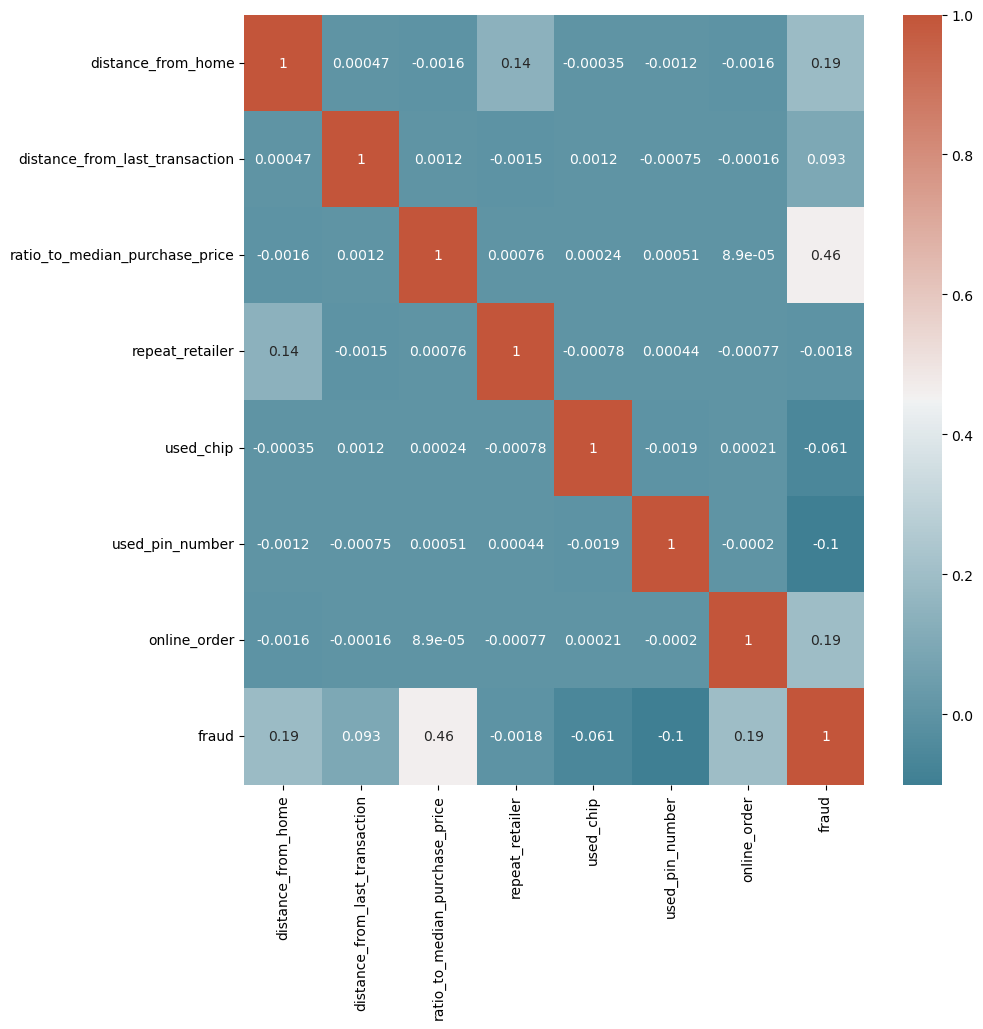

In [11]:
#understand if any correlation exists between any of the variables in the dataset
corr = df.corr() #generates a table of all correlations between each variable
#Creates and changes the figure and axis size to accomodate all information
fig, ax = plt.subplots(figsize=(10, 10))
heatmap = sns.heatmap(corr, xticklabels = corr.columns, 
            yticklabels= corr.columns, 
            annot=True,
            cmap = sns.diverging_palette(220,20,as_cmap=True))
plt.show(heatmap)

- Should acnowledge that the heatmap can be analysed for numerical variables and cannot be used to find any distribution between a mumerical variable and a binary variable. See quote block below.
- The strongest correlation between two variables seem to be 0.14. 
- Otherwise, there are no prominent correlations between any of the variables, with most of the correlation variables ranging closer to 0.
```
Can one use a heatmap to evaluate two different types of variables. Strongest correlation between distanfce from home and the transaction being qualified as repeat transaction is observed to be 0.14, is it accurate to say this relatively dependent (compared to relationships between other variables) relationship is noteworthy/credible? 
```

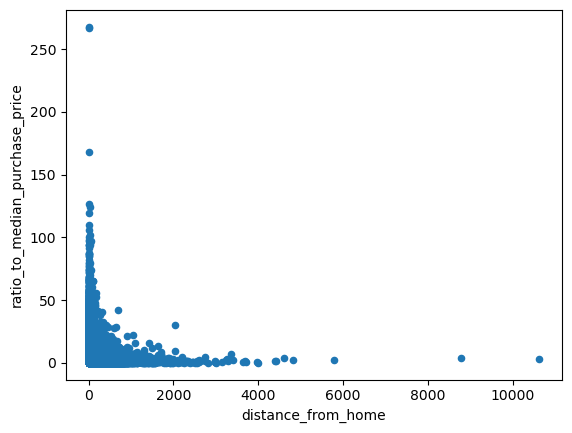

In [12]:
#exploring not just the research question but understanding if there could be any other way of defining a relationship other than
scatterplot = df.plot(kind='scatter',x='distance_from_home',y='ratio_to_median_purchase_price')
plt.show(scatterplot)

- Scatterplot demonstrates a relatively linear homogenous function where the ratio to median purchse price of the distance from home is proportional. 
- Note there are several outliars, visualisation is weak with overlapping datapoints
- There might be a diminishing effect of the distance from home on the ratio to median purchase price? To make sense of it, there is a steeper drop int he ratio of the median purchase price as distance from home increases and the decrease in the price is lower as the distance from home significantly increases beyond 500km. 
```
Can this be explained through further visualisation, can one make sense of it better?
```

In [14]:
#PLotting distplot to compare continuous variable with a binary one to start answering the research questions.
import seaborn as sns
import pandas as pd

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
lineplot = sns.lineplot(data=df, x='distance_from_home', y='distance_from_last_transaction', hue='fraud')
plt.show(lineplot)